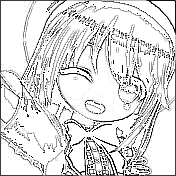

In [1]:
from PIL import Image, ImageFilter, ImageOps
from IPython.display import display
import numpy as np

with Image.open("ymm.jpg") as im:
    # im.rotate(45).show()
    im = im.quantize(10)
    im = im.convert("L")
    im = im.filter(ImageFilter.FIND_EDGES)
    im = ImageOps.invert(im)
    # im = im.point( lambda p: 255 if p > 200 else 0)
    a = np.asarray(im)
    display(im)


In [2]:
threshold = 200
f = lambda x: 0 if x > threshold else 1 # binarize to one-bit image
f = np.vectorize(f)
a = f(a)


In [9]:
gap = 10  # pixel(s)
target_color = 1 # white

def make_line(a):
    dotted_line = []
    head = None
    for i in range(len(a) - 1):
        if head is None and a[i] == target_color:
            head = i
        if head is not None and a[i + 1] != target_color:
            tail = i
            dotted_line += [(head * gap, tail * gap)]
            head = None
        if i == len(a) - 2 and a[i + 1] == target_color:
            if head is None:
                head= i +1
            tail = i +1
            dotted_line += [(head * gap, tail * gap)]
    return dotted_line

def make_lines(a):
    dotted_lines = []
    for a_ in a:
        dotted_lines += [make_line(a_)]
    return dotted_lines

[[(20, 20), (40, 60), (90, 90)], [(40, 60), (90, 100)]]
